# Validate candlestick patterns

In [1]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np
import datetime
from configparser import ConfigParser

In [2]:
configur = ConfigParser()
print (configur.read('config.ini'))
#print ("Sections : ", configur.sections())

['config.ini']


## Get the data

### Parameters

In [3]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "1 Jan, 2020"
end_date = "30 Sep, 2022"

In [4]:
input_data_path = '../data'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [5]:
df = pd.read_csv(full_path_input_data)

In [6]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1577836800000,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,...,0,0,0,0,0,0,0,0,0,0
1,1577923200000,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,...,0,0,0,0,0,0,0,0,0,0
2,1578009600000,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,...,0,0,0,0,0,0,0,0,0,0
3,1578096000000,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,...,0,0,0,0,0,0,0,0,0,0
4,1578182400000,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,...,0,0,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [7]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [8]:
window_size = configur.getint('candlestick_patterns', 'window_size')
slope_size = configur.getint('candlestick_patterns', 'slope_size')

### Get the dates from the bullish candlesticks patterns

In [9]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['formatted_open_time'].to_list()

In [10]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [14]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:1
BEFORE: number of hammer:21
BEFORE: number of piercing:0
BEFORE: number of morning star:2
BEFORE: number of bullish engulfing:48


#### Run the checks to identify the real candlesticks with reversal

In [15]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
list_sign_invertedhammer = [0] * len(list_all_dates)
for date in list_dates_invertedhammer:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(i*100)
        list_sign_invertedhammer[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_invertedhammer.append(0)

In [16]:
print(dict(zip(list_validate_dates_invertedhammer, list_new_sign_invertedhammer)))

{}


In [17]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
list_sign_hammer = [0] * len(list_all_dates)
for date in list_dates_hammer:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):    
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(i*100)
        list_sign_hammer[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_hammer.append(0)

In [18]:
print(dict(zip(list_validate_dates_hammer, list_new_sign_hammer)))

{'2020-02-22': 16.471973303149007, '2020-03-28': 74.10211889681898, '2020-04-01': 29.279081494966803, '2020-04-13': 64.46715017960108, '2020-08-22': 64.59888973534339, '2020-11-14': 61.824310876845686, '2020-11-22': 70.01064528913042, '2020-12-09': 62.43517180795367, '2020-12-11': 36.59852333946682, '2021-10-17': 39.13038685586695, '2021-11-19': 12.2418340795901, '2022-03-05': 64.58035028109968, '2022-05-07': 0.16163115830141073, '2022-06-30': 56.57300327936762, '2022-07-26': 66.86227323004744, '2022-09-16': 51.788668498691194}


In [19]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
list_sign_piercing = [0] * len(list_all_dates)
for date in list_dates_piercing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(i*100)
        list_sign_piercing[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_piercing.append(0)

In [20]:
print(dict(zip(list_validate_dates_piercing, list_new_sign_piercing)))

{}


In [21]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
list_sign_morningstar = [0] * len(list_all_dates)
for date in list_dates_morningstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if(i >= 0):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(i*100)
        list_sign_morningstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_morningstar.append(0)

In [22]:
print(dict(zip(list_validate_dates_morningstar, list_new_sign_morningstar)))

{}


In [23]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
list_sign_bullishengulfing = [0] * len(list_all_dates)
for date in list_dates_bullishengulfing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    # print(f'date:{date}|i:{i}')
    if(i >= 0):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(i*100)
        list_sign_bullishengulfing[list_all_dates.index(date)] = i*100
    # else:
    #     list_new_sign_bullishengulfing.append(0)
    #     list_sign_bullishengulfing.append(0)

In [24]:
print(dict(zip(list_validate_dates_bullishengulfing, list_new_sign_bullishengulfing)))

{'2020-02-11': 7.925236628009663, '2020-02-14': 80.86531971158047, '2020-03-30': 59.54326238856235, '2020-04-29': 16.21884003009165, '2020-05-05': 69.36146168910015, '2020-05-27': 18.423413270464888, '2020-07-12': 16.08372934787397, '2020-08-24': 51.64014772110141, '2020-12-28': 47.193177276659306, '2021-01-13': 67.18801545522747, '2021-01-18': 1.7051430297489827, '2021-02-05': 10.23504923815733, '2021-03-01': 20.05739241874797, '2021-04-08': 62.5001990090026, '2021-06-09': 52.999049242139805, '2021-08-04': 68.37242657148747, '2021-08-27': 47.92506345735521, '2021-09-22': 54.04451935943222, '2022-02-14': 66.39057404592256, '2022-03-18': 30.457807526254694, '2022-04-03': 70.81805875251233, '2022-08-05': 57.73502975179646}


#### Get the amount of candlesticks patterns (after check)

In [25]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:0
AFTER: number of hammer:16
AFTER: number of piercing:0
AFTER: number of morning star:0
AFTER: number of bullish engulfing:22


### Plot some results

#### Inverted Hammer

In [26]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
print(list_validate_dates_invertedhammer[random_date])
print(list_new_sign_invertedhammer[random_date])
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hammer

326
2020-11-22
70.01064528913042


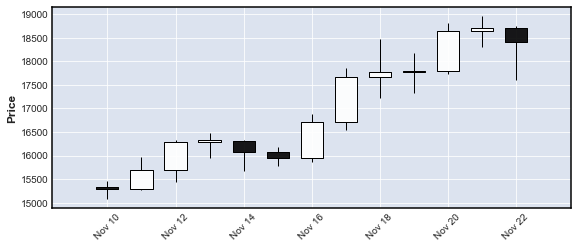

In [27]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
print(list_validate_dates_hammer[random_date])
print(list_new_sign_hammer[random_date])
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

In [28]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
print(list_validate_dates_piercing[random_date])
print(list_new_sign_piercing[random_date])
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Morning Star

In [29]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
print(list_validate_dates_morningstar[random_date])
print(list_new_sign_morningstar[random_date])
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Bullish engulfing

44
2020-02-14
80.86531971158047


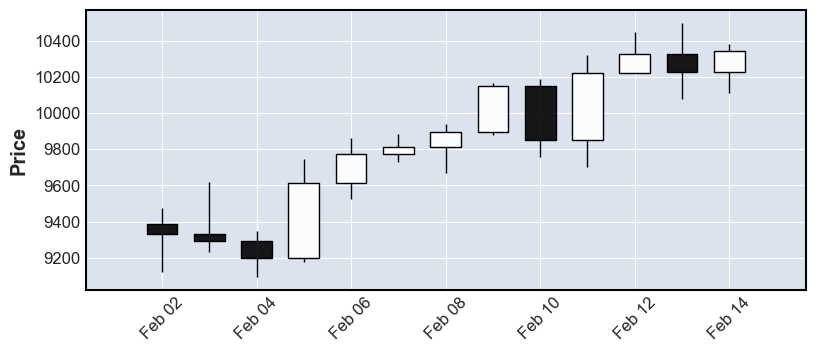

In [30]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
print(list_validate_dates_bullishengulfing[random_date])
print(list_new_sign_bullishengulfing[random_date])
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [31]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [32]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:0
BEFORE: number of hangingman:13
BEFORE: number of dark cloud cover:0
BEFORE: number of evening star:1
BEFORE: number of bearish engulfing:36


#### Run the checks to identify the real candlesticks with reversal

In [33]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
list_sign_shootingstar = [0] * len(list_all_dates)
for date in list_dates_shootingstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(i*100)
        list_sign_shootingstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_shootingstar.append(0)                    

In [51]:
print(dict(zip(list_validate_dates_shootingstar, list_new_sign_shootingstar)))

{}


In [34]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
list_sign_hangingman = [0] * len(list_all_dates)
for date in list_dates_hangingman:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(i*100)
        list_sign_hangingman[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_hangingman.append(0)         

In [52]:
print(dict(zip(list_validate_dates_hangingman, list_new_sign_hangingman)))

{'2020-03-18': -75.48217169712446, '2020-09-12': -67.25130481706013, '2020-12-06': -28.46672812771604, '2021-03-06': -57.710588848107825, '2022-06-25': -65.07567101895104, '2022-09-11': -49.23833524269791}


In [35]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
list_sign_darkcloudcover = [0] * len(list_all_dates)
for date in list_dates_darkcloudcover:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(i*100)
        list_sign_darkcloudcover[list_all_dates.index(date)] = i*100   
    # else:
    #     list_sign_darkcloudcover.append(0)          

In [53]:
print(dict(zip(list_validate_dates_darkcloudcover, list_new_sign_darkcloudcover)))

{}


In [36]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
list_sign_eveningstar = [0] * len(list_all_dates)
for date in list_dates_eveningstar:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(i*100)
        list_sign_eveningstar[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_eveningstar.append(0)         

In [54]:
print(dict(zip(list_validate_dates_eveningstar, list_new_sign_eveningstar)))

{'2022-06-01': -39.42775172631308}


In [37]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
list_sign_bearishengulfing = [0] * len(list_all_dates)
for date in list_dates_bearishengulfing:
    i = u.check_intensity_trend(df, date, window_size, slope_size)
    if (i<=0):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(i*100)
        list_sign_bearishengulfing[list_all_dates.index(date)] = i*100
    # else:
    #     list_sign_bearishengulfing.append(0)         

In [55]:
print(dict(zip(list_validate_dates_bearishengulfing, list_new_sign_bearishengulfing)))

{'2020-09-08': -22.226372002860153, '2020-09-28': -59.42745649003929, '2020-12-04': -22.209606852592657, '2021-01-31': -55.66728281850365, '2021-03-24': -24.174555666039975, '2021-05-23': -79.55751625268196, '2021-07-05': -20.188165431450138, '2021-07-12': -41.899537073310285, '2021-07-15': -68.61129999661732, '2021-07-19': -23.557585791115827, '2021-09-07': -0.9564266621357388, '2021-09-19': -28.858776629521778, '2021-11-26': -66.91765863603092, '2022-06-01': -39.42775172631308, '2022-08-09': -64.01190592217192, '2022-09-02': -66.79883940697763}


#### Get the amount of candlesticks patterns (after check)

In [38]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:0
AFTER: number of hangingman:6
AFTER: number of dark cloud cover:0
AFTER: number of evening star:1
AFTER: number of bearish engulfoing:16


### Plot some results

#### Shooting Star

In [39]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
print(list_validate_dates_shootingstar[random_date])
print(list_new_sign_shootingstar[random_date])
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hangingman

906
2022-06-25
-65.07567101895104


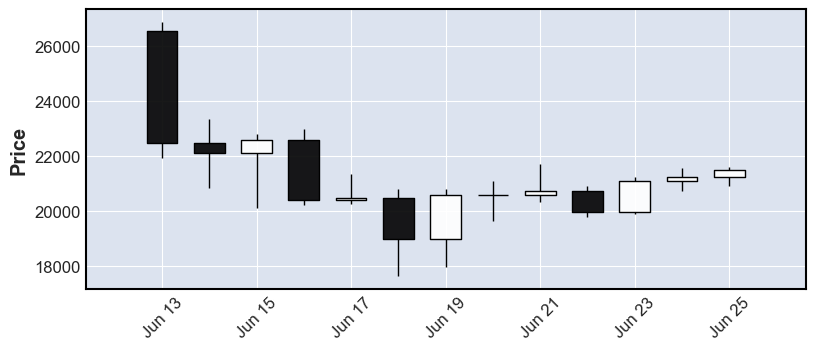

In [40]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
print(list_validate_dates_hangingman[random_date])
print(list_new_sign_hangingman[random_date])
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

In [41]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
print(list_validate_dates_darkcloudcover[random_date])
print(list_new_sign_darkcloudcover[random_date])
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Evening Star

882
2022-06-01
-39.42775172631308


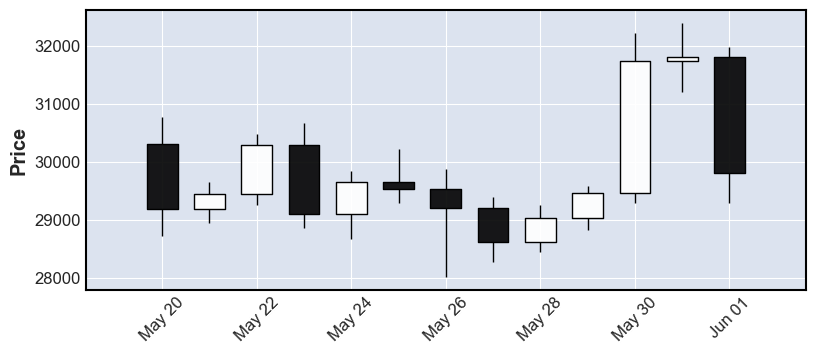

In [42]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
print(list_validate_dates_eveningstar[random_date])
print(list_new_sign_eveningstar[random_date])
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Bearish Engulfing

251
2020-09-08
-22.226372002860153


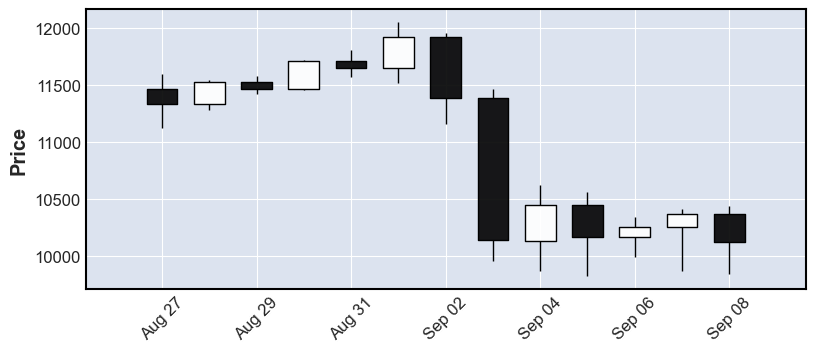

In [43]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
print(list_validate_dates_bearishengulfing[random_date])
print(list_new_sign_bearishengulfing[random_date])
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [44]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

# list_of_list_new_sign_pos = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_bullishengulfing]
# list_of_list_new_sign_neg = [list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar, list_new_sign_bearishengulfing]

list_of_list_sign_pos = [list_sign_invertedhammer, list_sign_hammer, list_sign_piercing, list_sign_morningstar, list_sign_bullishengulfing]
list_of_list_sign_neg = [list_sign_shootingstar, list_sign_hangingman, list_sign_darkcloudcover, list_sign_eveningstar, list_sign_bearishengulfing]

In [46]:
df.shape

(1004, 28)

In [47]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), list_of_list_sign_pos[i], 0)

In [48]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), list_of_list_sign_neg[i], 0)

In [49]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1577836800000,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2020-01-02,1577923200000,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2020-01-03,1578009600000,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2020-01-04,1578096000000,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0
2020-01-05,1578182400000,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,...,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0


### Check

In [50]:
df[df['CDLENGULFINGBEARISH_NEW'] < 0]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2020-09-08,1599523200000,10373.45,10438.00,9850.00,10126.65,73491.878418,1599609599999,7.429479e+08,1048125,34410.814470,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-22.226372
2020-09-28,1601251200000,10774.26,10950.00,10626.00,10696.12,50095.251734,1601337599999,5.444632e+08,686664,25219.073315,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-59.427456
2020-12-04,1607040000000,19422.34,19527.00,18565.31,18650.52,71283.668200,1607126399999,1.358080e+09,1286657,32363.453715,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-22.209607
2021-01-31,1612051200000,34262.89,34342.69,32171.67,33092.98,68742.280384,1612137599999,2.289641e+09,1707064,32480.447358,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-55.667283
2021-03-24,1616544000000,54342.80,57200.00,51700.00,52303.65,83537.465021,1616630399999,4.583160e+09,2401988,39323.130067,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-24.174556
2021-05-23,1621728000000,37458.51,38270.64,31111.01,34655.25,217136.046593,1621814399999,7.431242e+09,4082004,104637.659409,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-79.557516
2021-07-05,1625443200000,35288.13,35293.78,33125.55,33690.14,64123.874245,1625529599999,2.183406e+09,1109367,31489.855372,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-20.188165
2021-07-12,1626048000000,34259.00,34678.43,32658.34,33086.63,48181.403762,1626134399999,1.620647e+09,1176847,22602.907306,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-41.899537
2021-07-15,1626307200000,32820.03,33185.25,31133.00,31880.00,51639.576353,1626393599999,1.652078e+09,1099367,24866.405787,...,0,0.0,0,0,0.0,0,0.0,0,0.000000,-68.611300


## Export the Data

### Export parameters

In [56]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [ ]:
df.to_csv(full_export_path, index=False)